In [ ]:
#IMPORT LIBRARY
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Download dataset
! wget -O kc_house_3_features.csv https://www.dropbox.com/scl/fi/dtjhx5eyh6d7nnyb381cb/kc_house_3_features.csv?rlkey=vi680shk7mbmlsio478gswf91&dl=0

--2023-09-02 04:54:45--  https://www.dropbox.com/scl/fi/dtjhx5eyh6d7nnyb381cb/kc_house_3_features.csv?rlkey=vi680shk7mbmlsio478gswf91
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/e/scl/fi/dtjhx5eyh6d7nnyb381cb/kc_house_3_features.csv?rlkey=vi680shk7mbmlsio478gswf91 [following]
--2023-09-02 04:54:45--  https://www.dropbox.com/e/scl/fi/dtjhx5eyh6d7nnyb381cb/kc_house_3_features.csv?rlkey=vi680shk7mbmlsio478gswf91
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc86f964d534fc0b3132070af46e.dl.dropboxusercontent.com/cd/0/inline/CC8J-iZ_IazeQn7SMcIVNyyyU-X3lluXHrdM5MzSu5ApPIyF6NrIeBWetJ4GpKfgAH3inDT98vY-BnH_tK0m5Ff9nX5c9SsXm-ZAiA782NA6E4LWSH2h7xdXGiqSyvrG401s7fVn7GInuTS6nrLXZP9e/file# [following]
--2023-09-02 04:54:46

In [ ]:
data= pd.read_csv ('kc_house_3_features.csv')
data.head() # untuk melihat beberapa baris pertama dari data

,sqft_living,sqft_living15,sqft_above,price
0,1180,1340,1180,221900
1,2570,1690,2170,538000
2,770,2720,770,180000
3,1960,1360,1050,604000
4,1680,1800,1680,510000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   sqft_living    100 non-null    int64
 1   sqft_living15  100 non-null    int64
 2   sqft_above     100 non-null    int64
 3   price          100 non-null    int64
dtypes: int64(4)
memory usage: 3.2 KB


In [ ]:
data.corr()

,sqft_living,sqft_living15,sqft_above,price
sqft_living,1.000000,0.774798,0.837615,0.650602
sqft_living15,0.774798,1.000000,0.755848,0.648145
sqft_above,0.837615,0.755848,1.000000,0.515989
price,0.650602,0.648145,0.515989,1.000000


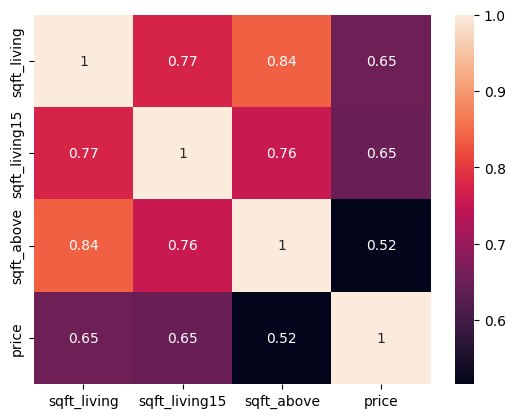

In [ ]:
sns.heatmap(data.corr(), annot=True)
plt.show()

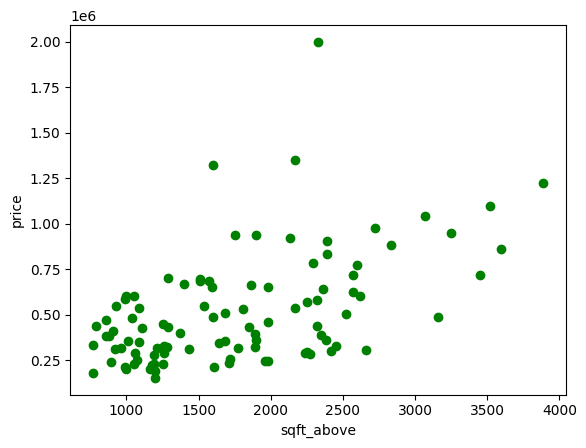

In [ ]:
plt.scatter(data['sqft_above'], data['price'], color='green')
plt.xlabel('sqft_above')
plt.ylabel('price')
plt.show()

Dari analisis korelasi terlihat variable yang punya hubungan linier (dari hubungan kuat ke lemah ) dengan price adalah

*   sqft_living
*   sqft_living15
*   sqft_above

Berikut hasil scatter plot tiap kolom.

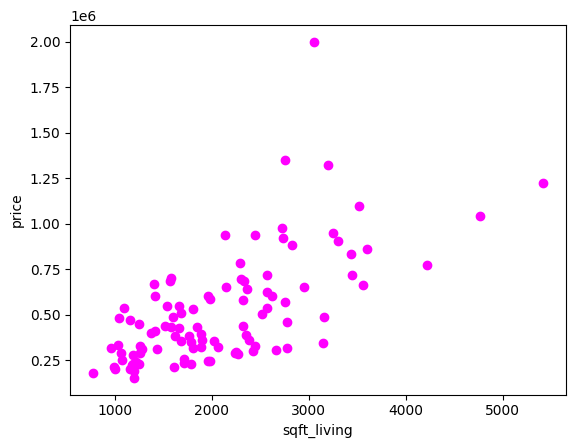

In [ ]:
plt.scatter(data['sqft_living'], data['price'], color='magenta')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

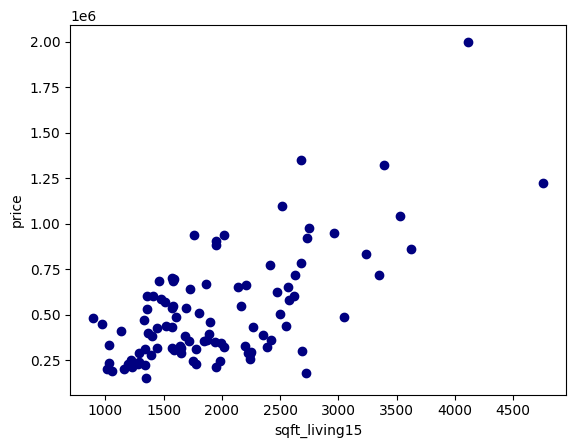

In [ ]:
plt.scatter(data['sqft_living15'], data['price'], color='navy')
plt.xlabel('sqft_living15')
plt.ylabel('price')
plt.show()

Terlihat bahwa sqft_living dan sqft_living15 plotnya masih cenderung membentuk garis yang menunjukkan masing-masing memiliki hubungan dengan price.

Sementara, sqft_above plotnya terlihat cenderung berpencar sehingga ada hubungan linier yang lemah dengan price.

Jadi kedepannya variabel independen digunakan sebagai feature adalah ketiga parameter tersebut.

In [ ]:
#SPLITTING DATA MENADI DATA TRAIN DAN TEST
features = ['sqft_living','sqft_living15', 'sqft_above']
X=data[features].values
Y=data.price

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=23)

In [ ]:
print('Data Train : ', end='')
print(X_train.shape, Y_train.shape)
print('\nData Test : ', end='')
print(X_test.shape, Y_test.shape)

Data Train : (80, 3) (80,)

Data Test : (20, 3) (20,)


In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

LinearRegression()

Hasil uji Kolmogorov Smirnov 
  KstestResult(statistic=0.1323167164684002, pvalue=0.11080879390488378, statistic_location=-0.07573059707714574, statistic_sign=-1)


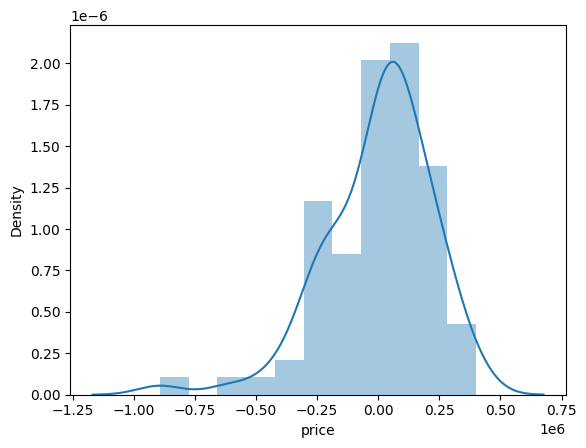

In [ ]:
y_predtrain= lin_reg.predict(X_train)
err = y_predtrain - Y_train
sns.distplot(err)

z_er = stats.zscore(err)
norm_er = stats.kstest(z_er, 'norm', )
print('Hasil uji Kolmogorov Smirnov \n ', norm_er)

Ho : data = berdistribusi normal

Ha : data tidak berdistribusi normal

Karena pvalue > 0.05, maka Ho diterima.

Plot histogram yang membentuk lonceng dan puncaknya cenderung ke tengah juga mendukung bahwa errornya sudah berdistribusi normal.

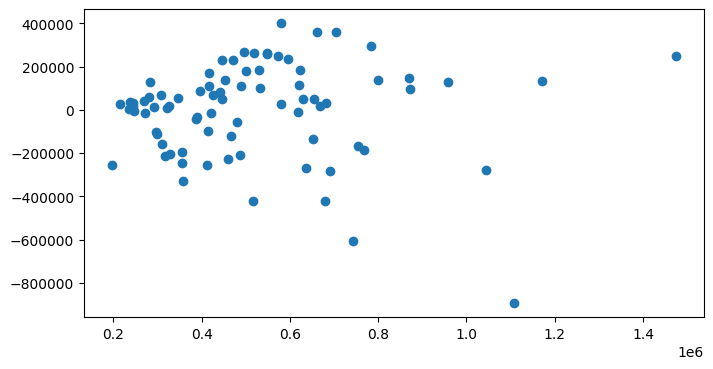

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(y_predtrain, err)
plt.show()

Terlihat plot error-nya berada di sekitar angka yang bervariasi saat nilai prediksinya bertambah.

Artinya nilai prediksi kita terganggu oleh errornya atau terjadi heteroskedastisitas.

In [ ]:
vif = [variance_inflation_factor(X_train, i) for i in range(len(X_train.T))]

pd.DataFrame({'VIF' : vif[0:]}, index=features).T

,sqft_living,sqft_living15,sqft_above
VIF,26.284273,19.275041,24.946889


Berdasarkan kriteria Ringle dan Hair, terjadi **kolinearitas**

In [ ]:
X_constant= sm.add_constant(X_train)
linreg=sm.OLS(Y_train, X_constant).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     29.36
Date:                Sat, 02 Sep 2023   Prob (F-statistic):           1.04e-12
Time:                        04:56:14   Log-Likelihood:                -1097.3
No. Observations:                  80   AIC:                             2203.
Df Residuals:                      76   BIC:                             2212.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.547e+04   7.54e+04     -1.266      0.209   -2.46e+05    5.47e+04
x1           164.9679     56.600      2.915      0.005      52.239     277.697
x2           233.7268     57.513      4.064      0.000     119.180     348.274
x3          -112.2904     67.313     -1.668      0.099    -246.356      21.775
==============================================================================
Omnibus:                       22.442   Durbin-Watson:                   1.773
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.156
Skew:                           1.110   Prob(JB):                     1.41e-08
Kurtosis:                       5.433   Cond. No.                     1.08e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Karena nilai dw (1.773) berada diantara nilai du (1.736) dan 4-du (2.529), maka tidak ada masalah autokorelasi.

In [ ]:
y_predtest = lin_reg.predict(X_test)

#MSE
MSE_train = mean_squared_error(Y_train, y_predtrain)
print('Nilai MSE data training = ', MSE_train)
MSE_test = mean_squared_error(Y_test, y_predtest)
print('Nilai MSE data testing = ', MSE_test)

#RMSE
RMSE_train = np.sqrt(MSE_train)
print('NIlai RMSE data training = ', RMSE_train)
RMSE_test = np.sqrt(MSE_test)
print('Nilai RMSE data testing = ', RMSE_test)

#MAE
MAE_train= mean_absolute_error(Y_train, y_predtrain)
print('NIlai MAE data training = ', MAE_train)
MAE_test = mean_absolute_error(Y_test, y_predtest)
print('NIlai MAE data testing = ', MAE_test)

Nilai MSE data training =  47994626311.29503
Nilai MSE data testing =  44047671395.58065
NIlai RMSE data training =  219076.75894830795
Nilai RMSE data testing =  209875.37110290155
NIlai MAE data training =  164060.7384825786
NIlai MAE data testing =  176540.63195959709


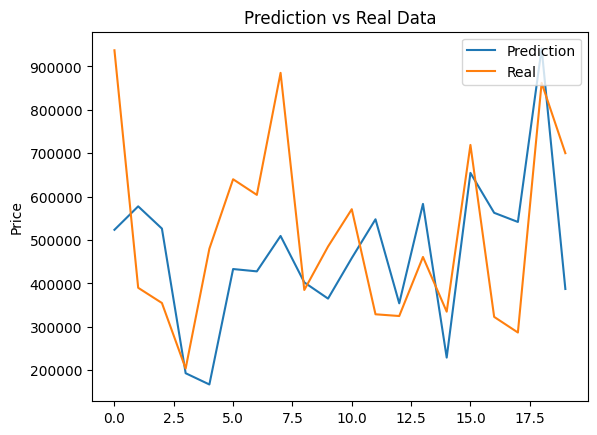

In [ ]:
plt.plot(y_predtest)
plt.plot(Y_test.values)

plt.title('Prediction vs Real Data')

plt.ylabel('Price')

plt.legend(labels=['Prediction','Real'], loc='upper right')

Terlihat bahwa nilai prediksi dan data testing tidak saling mendekati secara grafik.

In [ ]:
print(f'R^2 score: {lin_reg.score(X, Y)}')

R^2 score: 0.4857485181186719


Terlihat nilai R2 = 0.4858, ini merupakan nilai yang kurang baik.

Nilai ini menunjukkan 48.58% dari price dapat diprediksi oleh sqft_living, sqft_living15, dan sqft_above.

Sisanya (51.42%) dipengaruhi faktor lain yang tidak ada di model ini.

In [ ]:
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     29.36
Date:                Sat, 02 Sep 2023   Prob (F-statistic):           1.04e-12
Time:                        04:57:18   Log-Likelihood:                -1097.3
No. Observations:                  80   AIC:                             2203.
Df Residuals:                      76   BIC:                             2212.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.547e+04   7.54e+04     -1.266      0.209   -2.46e+05    5.47e+04
x1           164.9679     56.600      2.915      0.005      52.239     277.697
x2           233.7268     57.513      4.064      0.000     119.180     348.274
x3          -112.2904     67.313     -1.668      0.099    -246.356      21.775
==============================================================================
Omnibus:                       22.442   Durbin-Watson:                   1.773
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.156
Skew:                           1.110   Prob(JB):                     1.41e-08
Kurtosis:                       5.433   Cond. No.                     1.08e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# KESIMPULAN
Karena model yang dibuat belum memenuhi Uji Asumsi Klasik (terjadi Heteroskedastisitas dan Multikolinearitas), maka model tersebut sudah tidak dapat dipakai untuk memprediksi data baru.